In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
basic_time_cols = ['tPNf', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 'tM']

In [6]:
zoe = pd.read_excel('../data/latest_Zoe central.xlsx')

In [7]:
pgt_results = pd.read_excel('../data/all_pgt.xlsx')

In [8]:
merged_pgt = pd.read_csv('../data/big_pgt_df.csv')


In [9]:
merged_pgt['Embryo Description_x'].value_counts()

Embryo Description_x
COMPLEX                    88
EUPLOID                    87
PGS - COMPLEX              70
PGS - NORMAL               51
CHAOTIC                    30
                           ..
EUPLOID (EMB 8)             1
TRIS 1 (EMB 7)              1
MONO 3 (EMB 6)              1
TRIS 6, MONO 12 (EMB 5)     1
monosomy 1                  1
Name: count, Length: 513, dtype: int64

In [10]:
list(merged_pgt.columns)

['Slide ID',
 'Patient ID_x',
 'Patient Name',
 'Birth Year',
 'Birth Month',
 'BMI',
 'Diagnosis',
 'Basal Serum FSH',
 'Patient Comments',
 'Fertilization',
 'Age',
 'Fertilization Method',
 'Fertilization Comment',
 'Transfer Validation',
 'Well',
 'Decision',
 'Embryo Description_x',
 'Embryo ID',
 'Treatment ID',
 'HCG Test',
 'Gestational Sacs',
 'Fetal Heart Beat',
 'Live Born',
 'Abortion',
 'Abortion Comment',
 'Sibling Embryos',
 'Medication Protocol',
 'Medication Trigger',
 'Medication Brand',
 'Medication FSH Dose',
 'LH Supplement',
 'Medication Comment',
 'Oocyte History',
 'Oocyte Source',
 'Oocytes Aspirated',
 'Media Type',
 'Media Brand 1',
 'Media Brand 2',
 'Media Change',
 'Media Comment',
 'Slide Description',
 'Start Time',
 'End Time',
 'Runs',
 'Annotation QC',
 'Annotation QC Date',
 'Annotation QC Status',
 'Clinical Slide Type',
 'Annotation QC Comment',
 'Instrument QC',
 'Instrument QC Date',
 'Instrument QC Decision',
 'Instrument QC Comment',
 'tPB2',
 

In [11]:
zoe['Diagnosis'].value_counts()

Diagnosis
Male factor                  2864
Unexplained Infertility       492
Unknown                       312
PCO                           239
Tubal factor                  168
Endometriosis                  72
Other                          36
Premature Ovarian Failure      12
Name: count, dtype: int64

In [12]:
filter = zoe["Comment - Time 1"] > 0


<Axes: >

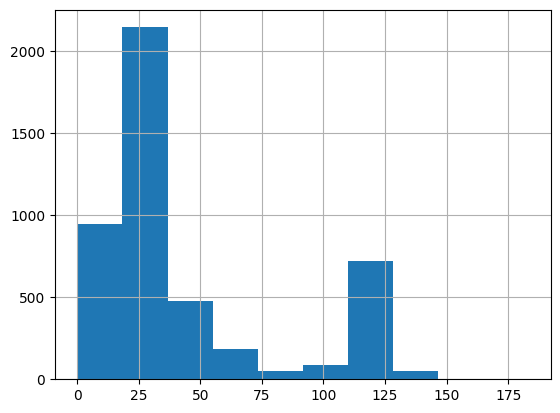

In [13]:
zoe['Comment - Time 1'].where(filter).hist()

In [14]:
zoe['Comment - Value 1'].value_counts()

Comment - Value 1
PN1&2                                 794
PN1                                   455
PB2                                   381
PNs DISAPPEAR                         343
FAIL CLEAVE                           323
                                     ... 
VACUOLATING                             1
CELLS RESORB                            1
normally fertilised.                    1
2pn after ca ionophore activation.      1
2x failed cleavages                     1
Name: count, Length: 574, dtype: int64

In [15]:
list(zoe['Embryo Description'].value_counts().index)

['NO BIOPSY',
 'EUPLOID',
 'COMPLEX',
 'MII',
 'PGS - COMPLEX',
 'PGS - NORMAL',
 'MI-MII',
 'METII',
 'UNAFFECTED',
 'NORMAL',
 'AFFECTED',
 'TESE',
 'CHAOTIC',
 'no biopsy',
 'NO RESULT',
 'MI',
 'euploid',
 'DONOR',
 'GLOBAL',
 'ABNORMAL',
 'PGD - AFFECTED',
 'HUSBAND SPERM',
 'complex',
 'DONOR SPERM',
 'UNBALENCED',
 'normal',
 'MONO 22',
 'unaffected',
 'abnormal',
 'PGD - UNAFFECTED',
 'COMPLEX ABNORMALITIES',
 'PGS - UNBALENCED / EUPLOID',
 'BIOPSY - AFFECTED',
 'manola maria 509483',
 'Direct Cleavage.',
 'PGS - NO RESULT',
 'SKALOUBAKA PANAGIOTA (492088)',
 'BIOPSY - UNAFFECTED',
 'METI',
 'affected',
 'MONO 15',
 'TRANSLOCATION ONLY',
 'ejaculated',
 'SAGE',
 'KATTI SPIRIDOULA 486621 (42)',
 'GAGNON ELENI 496752 (29)',
 'TSIKLIDI MARIA-(491713) (27)',
 'd5 biopsy',
 'FOUDA PANAGIOTA 496750 (41)',
 'SSM',
 'TRIS 22',
 'DAY 3',
 'vamvakari maria 509446 (39)',
 'DISCARDED',
 'KOUSOUNI OLGA 480707 AGE 40 1ST SHORT',
 'REBOUTSIKA CHRISTINA 492369 AGE 41',
 'matheou konstandina 51

In [16]:
pd.merge(merged_pgt[['Slide ID', 'Well', 'PGT Result']],
         zoe,
         on=['Slide ID', 'Well'])['PGT Result'].value_counts()

PGT Result
euploid                                           214
complex abnormalities                             121
complex abn                                        45
complex                                            33
Unbalanced for the translocation                   28
                                                 ... 
isochromosome 21                                    1
monosomy 8,trisomy 16                               1
trisomy 15, 22                                      1
monosomy 11                                         1
trisomy 16, monosomy 22, structural monosomy 8      1
Name: count, Length: 396, dtype: int64

In [17]:
[
    m for m in merged_pgt['PGT Result'].value_counts().index
    if 'mosaic' in m.lower() and 'monosomy' in m.lower()
]

['mosaic monosomy 2',
 'mosaic monosomy 13 50% no et',
 'monosomy 10, mosaic monosomy 2',
 'mosaic partial monosomy 14q',
 'mosaic monosomy 9,22 (70%)',
 'mosaic monosomy 7',
 'mosaic monosomy 4',
 'mosaic monosomy 8',
 'mosaic monosomy 3, mosaic trisomy 15, duplication 6q',
 'mosaic monosomy 2,3,X',
 'mosaic trisomy 13, mosaic monosomy 2p16.3',
 'unbalanced/mosaic monosomy 13',
 'mosaic trisomy 2, mosaic monosomy 13',
 'mosaic partial monosomy 16',
 'monosomy 2, mosaic partial trisomy 11',
 'mosaic monosomy 19',
 'mosaic monosomy 9(70%), monosomy 21(75%),monosomy X(75%)',
 'mosaic partial monosomy 18',
 'monosomy 4,7, mosaic trisomy 22',
 'monosomy 14, mosaic monosomy 1, mosaic trisomy 17,19']

In [18]:
sns.distplot(
    merged_pgt.loc[merged_pgt['PGT Result'] != 'euploid']['t4'].dropna())
sns.distplot(
    merged_pgt.loc[merged_pgt['PGT Result'] == 'euploid']['t4'].dropna())
sns.distplot(zoe['tM'].dropna())

NameError: name 'sns' is not defined

In [19]:
time_cols_all = [
    'tPB2',
    'tPNa',
    'tPNf',
    't2',
    't3',
    't4',
    't5',
    't6',
    't7',
    't8',
    't9',
    'tSC',
    'tM',
    'tSB',
    'tB',
    'tEB',
    'tHB',
    'tDead',
    # 'Dynamic Score - Time',
    # 'Morphological Grade - Time',
    # 'transfer',
    # 'Z Score - Time',
    'Fragmentation - Time 1',
    'Multi Nucleation - Time 1',
    'Blastomere Size - Time 1',
    'Irregular Division - Time 1',
    'Comment - Time 1',
    'Pronuclei - Time 1',
]

In [35]:
zoe[time_cols_all].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26541 entries, 0 to 26540
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tPB2                         236 non-null    float64
 1   tPNa                         255 non-null    float64
 2   tPNf                         11318 non-null  float64
 3   t2                           12858 non-null  float64
 4   t3                           12525 non-null  float64
 5   t4                           12130 non-null  float64
 6   t5                           10988 non-null  float64
 7   t6                           10323 non-null  float64
 8   t7                           9511 non-null   float64
 9   t8                           8517 non-null   float64
 10  t9                           5573 non-null   float64
 11  tSC                          1704 non-null   float64
 12  tM                           2774 non-null   float64
 13  tSB             

In [36]:
basic_time_cols = [
    # 'tPB2',
    # 'tPNa',
    'tPNf',
    't2',
    't3',  # only relevant for direct cleavage
    't4',
    't5',
    't6',
    't7',
    't8',
    't9',  # nine or more cells
    'tSC',  # start of compaction
    'tM',  # morula
    'tSB',  # start of blastulation
    'tB',  # blastocyst formation
    'tEB',
    # 'tHB',
    # 'tDead',
]
dt_cols = [f'dt_{i}' for i in range(len(basic_time_cols) - 1)]
dts = zoe[basic_time_cols].dropna().diff(axis=1).dropna(axis=1)
dts.columns = dt_cols

In [37]:
dt_cols

['dt_0',
 'dt_1',
 'dt_2',
 'dt_3',
 'dt_4',
 'dt_5',
 'dt_6',
 'dt_7',
 'dt_8',
 'dt_9',
 'dt_10',
 'dt_11',
 'dt_12']

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
relevant_t_df = zoe[basic_time_cols].dropna()

array([[<Axes: title={'center': 'dt_0'}>,
        <Axes: title={'center': 'dt_1'}>,
        <Axes: title={'center': 'dt_2'}>,
        <Axes: title={'center': 'dt_3'}>],
       [<Axes: title={'center': 'dt_4'}>,
        <Axes: title={'center': 'dt_5'}>,
        <Axes: title={'center': 'dt_6'}>,
        <Axes: title={'center': 'dt_7'}>],
       [<Axes: title={'center': 'dt_8'}>,
        <Axes: title={'center': 'dt_9'}>,
        <Axes: title={'center': 'dt_10'}>,
        <Axes: title={'center': 'dt_11'}>],
       [<Axes: title={'center': 'dt_12'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

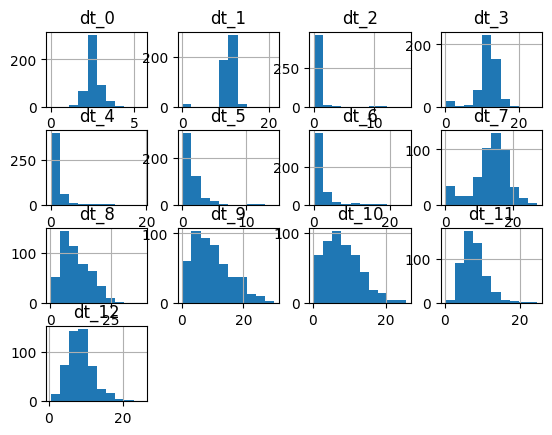

In [50]:
dts.hist()

Distribution: gumbel_r
  Params: (np.float64(-0.47557113871895357), 1.2001970777432125)
  KS Statistic: 0.16029673975541514
  KS p-value: 1.203254338455748e-11

Distribution: weibull_max
  Params: (np.float64(7.100897137648724), np.float64(7.000574533654238), np.float64(7.404540863222947))
  KS Statistic: 0.12273556331082591
  KS p-value: 5.373096088874667e-07

Distribution: pareto
  Params: (np.float64(401042414.3258516), np.float64(-2147483653.3547544), 2147483648.0)
  KS Statistic: 0.497992023698677
  KS p-value: 1.1602136836926097e-114

Distribution: halfnorm
  Params: (np.float64(-5.354754237389148), np.float64(5.447328973252582))
  KS Statistic: 0.5133227691025178
  KS p-value: 2.4430683327048245e-122

Best distribution: weibull_max with AIC: 1463.798976053999


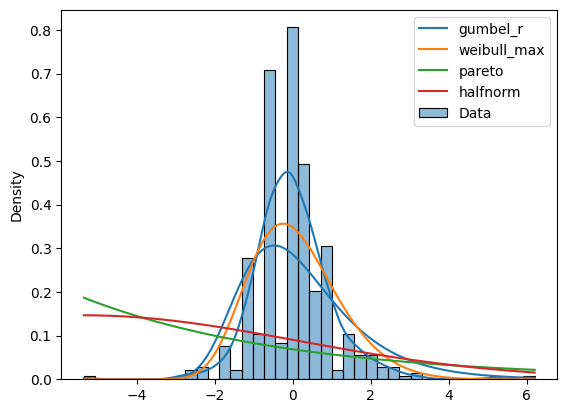

Distribution: gumbel_r
  Params: (np.float64(-0.6265457278554543), 1.7980009661995642)
  KS Statistic: 0.2998599050288021
  KS p-value: 3.30611422785876e-40

Distribution: weibull_max
  Params: (np.float64(4.4108023334810795), np.float64(5.781174437411682), np.float64(6.207470175420445))
  KS Statistic: 0.24658894003340517
  KS p-value: 3.722823343856609e-27

Distribution: pareto
  Params: (np.float64(94227152.29073752), np.float64(-536870917.6976243), np.float64(536870911.9999999))
  KS Statistic: 0.5399045493117898
  KS p-value: 2.138118081313009e-136

Distribution: halfnorm
  Params: (np.float64(-5.697624367919334), np.float64(5.784714637551986))
  KS Statistic: 0.5664636196322849
  KS p-value: 1.9395342755403737e-151

Best distribution: weibull_max with AIC: 1638.1405648247664


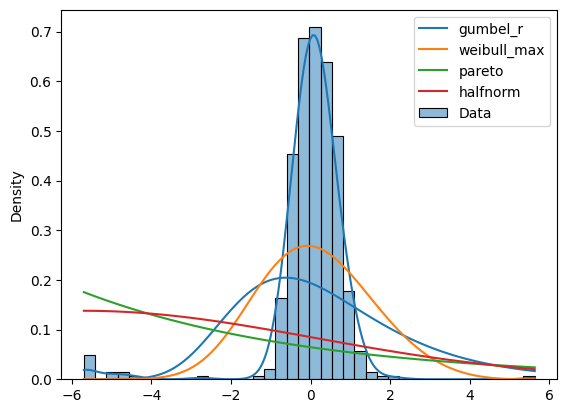

Distribution: gumbel_r
  Params: (np.float64(-0.2556095057680159), 0.31744596716041085)
  KS Statistic: 0.22054172970410496
  KS p-value: 9.404922861697642e-22

Distribution: weibull_max
  Params: (np.float64(872406258.6515245), np.float64(747688898.251005), np.float64(747688898.4448862))
  KS Statistic: 0.38788374557544386
  KS p-value: 5.805588449313877e-68

Distribution: pareto
  Params: (np.float64(165822411.59182116), np.float64(-67108864.40470323), np.float64(67108863.999999985))
  KS Statistic: 0.38554213185472763
  KS p-value: 4.044972857936308e-67

Distribution: halfnorm
  Params: (np.float64(-0.40470323595638746), np.float64(1.0787885377559272))
  KS Statistic: 0.5285292760872831
  KS p-value: 2.914126457422106e-130

Best distribution: pareto with AIC: 101.0171854066556


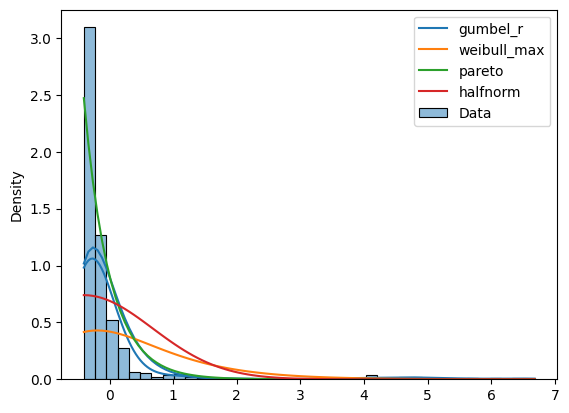

Distribution: gumbel_r
  Params: (np.float64(-0.5654885548845193), 1.3735803424756137)
  KS Statistic: 0.230155868621733
  KS p-value: 1.1295264668669452e-23

Distribution: weibull_max
  Params: (np.float64(4.126933087931866), np.float64(4.490409359191993), np.float64(4.887892125282798))
  KS Statistic: 0.17933775136533195
  KS p-value: 1.7450985205723486e-14

Distribution: pareto
  Params: (np.float64(72761745.48829205), np.float64(-268435459.68923885), 268435456.0)
  KS Statistic: 0.4614629090391943
  KS p-value: 1.4113352373365776e-97

Distribution: halfnorm
  Params: (np.float64(-3.6892388328461534), np.float64(3.8223661736913757))
  KS Statistic: 0.4689043031991592
  KS p-value: 6.35691420714808e-101

Best distribution: weibull_max with AIC: 1515.7739937765136


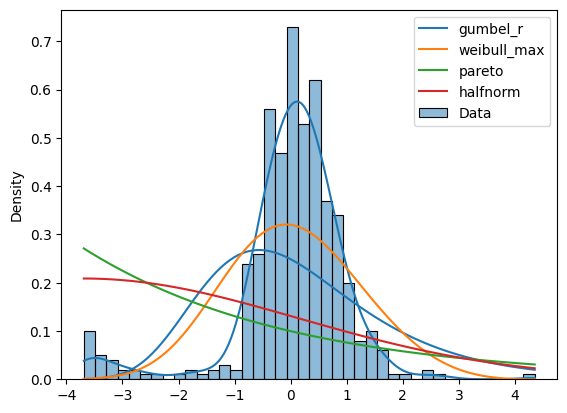

Distribution: gumbel_r
  Params: (np.float64(-0.3098406747150338), 0.4178704147257877)
  KS Statistic: 0.15309432683271051
  KS p-value: 1.1729337484362262e-10

Distribution: weibull_max
  Params: (np.float64(159006096.95627534), np.float64(67007847.11032665), np.float64(67007847.41924768))
  KS Statistic: 0.15465996191046738
  KS p-value: 7.215233112235221e-11

Distribution: pareto
  Params: (np.float64(2.513297210606196), np.float64(-1.5698911404817828), 0.9495703435675524)
  KS Statistic: 0.14056224899598338
  KS p-value: 4.782590120560566e-09

Distribution: halfnorm
  Params: (np.float64(-0.6203207969142303), np.float64(1.1767743586109893))
  KS Statistic: 0.34869961367172125
  KS p-value: 1.2711216028133005e-54

Best distribution: pareto with AIC: 428.8443451508707


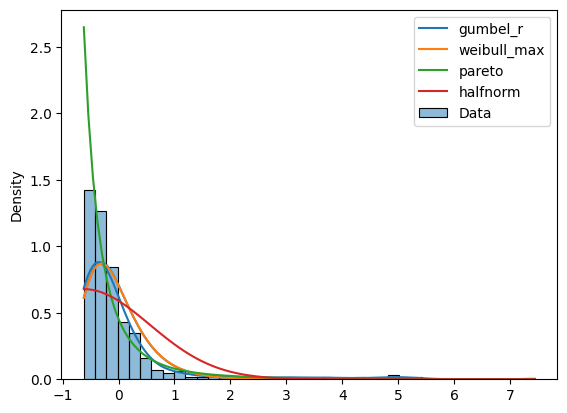

Distribution: gumbel_r
  Params: (np.float64(-0.34609447132303855), 0.49735540321860655)
  KS Statistic: 0.12589804243947744
  KS p-value: 2.4376153309151107e-07

Distribution: weibull_max
  Params: (np.float64(783296632.7458347), np.float64(500037526.3953262), np.float64(500037526.7044131))
  KS Statistic: 0.16444002263688567
  KS p-value: 3.093374014904197e-12

Distribution: pareto
  Params: (np.float64(4.984143541269741), np.float64(-3.8833950259157985), np.float64(3.1031803961433857))
  KS Statistic: 0.10843373493975793
  KS p-value: 1.4875878437297983e-05

Distribution: halfnorm
  Params: (np.float64(-0.7802146297724125), np.float64(1.2683591244245074))
  KS Statistic: 0.24226604082876757
  KS p-value: 3.246171352315438e-26

Best distribution: pareto with AIC: 729.8950056428974


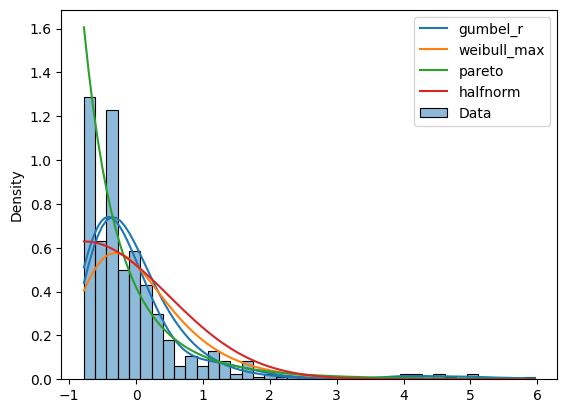

Distribution: gumbel_r
  Params: (np.float64(-0.331919604925515), 0.4459987582618577)
  KS Statistic: 0.15997270732550206
  KS p-value: 1.3361186548761248e-11

Distribution: weibull_max
  Params: (np.float64(1318263.5616361513), np.float64(588436.7090054499), np.float64(588437.0406610568))
  KS Statistic: 0.16020859879479288
  KS p-value: 1.2380550353579011e-11

Distribution: pareto
  Params: (np.float64(2.168470033173137), np.float64(-1.448832011669911), np.float64(0.7999192715966504))
  KS Statistic: 0.1445783132530116
  KS p-value: 1.509436046446302e-09

Distribution: halfnorm
  Params: (np.float64(-0.6489127400732604), np.float64(1.1920938487507544))
  KS Statistic: 0.3448341901558111
  KS p-value: 2.153460466514659e-53

Best distribution: pareto with AIC: 468.0327467725211


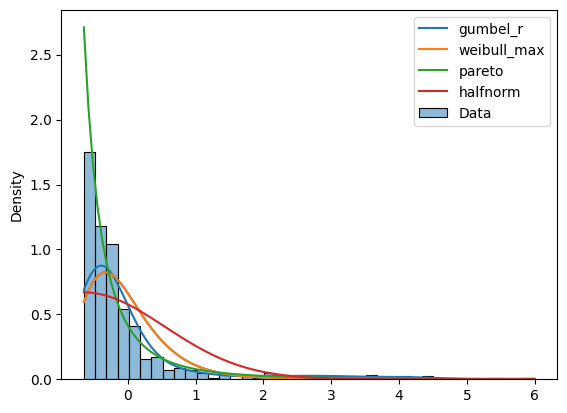

Distribution: gumbel_r
  Params: (np.float64(-0.5331324950768552), 1.12046357411772)
  KS Statistic: 0.1569887933492013
  KS p-value: 3.4698368565849224e-11

Distribution: weibull_max
  Params: (np.float64(0.834480805399828), np.float64(2.647879863814451), np.float64(1.4093550351578523))
  KS Statistic: 0.5756858865855027
  KS p-value: 6.600534159305719e-157

Distribution: pareto
  Params: (np.float64(210054415.04933235), np.float64(-536870914.5558659), np.float64(536870911.9999999))
  KS Statistic: 0.3405092024935477
  KS p-value: 4.897782490076793e-52

Distribution: halfnorm
  Params: (np.float64(-2.555865927199009), np.float64(2.7445310415108897))
  KS Statistic: 0.33124104392998505
  KS p-value: 3.414651754516517e-49

Best distribution: gumbel_r with AIC: 1587.1984924729552


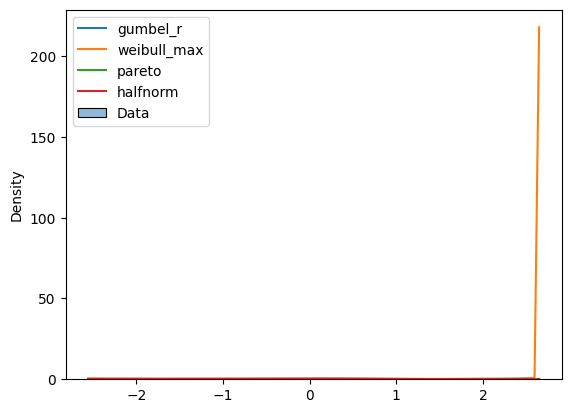

Distribution: gumbel_r
  Params: (np.float64(-0.4619511989030474), 0.7869757791493746)
  KS Statistic: 0.049285722327238046
  KS p-value: 0.17205360615688592

Distribution: weibull_max
  Params: (np.float64(60711670.383599), np.float64(47746400.45443556), np.float64(47746400.916601755))
  KS Statistic: 0.0495201304029973
  KS p-value: 0.16810840576015929

Distribution: pareto
  Params: (np.float64(75983245.3245407), np.float64(-134217729.76641217), 134217728.0)
  KS Statistic: 0.20795643992567842
  KS p-value: 2.2814117609153772e-19

Distribution: halfnorm
  Params: (np.float64(-1.7664121659953156), np.float64(2.0298305200622693))
  KS Statistic: 0.15085130592301005
  KS p-value: 2.332302655522267e-10

Best distribution: gumbel_r with AIC: 1346.0478887746729


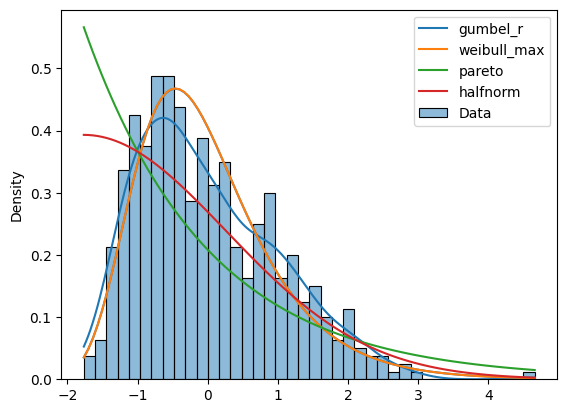

Distribution: gumbel_r
  Params: (np.float64(-0.4642020453390692), 0.7940869044818695)
  KS Statistic: 0.042027404540044055
  KS p-value: 0.3333064855693887

Distribution: weibull_max
  Params: (np.float64(23150400.91678159), np.float64(18384183.75613816), np.float64(18384184.22032964))
  KS Statistic: 0.042033266724847196
  KS p-value: 0.33314389641042763

Distribution: pareto
  Params: (np.float64(87061780.01524295), np.float64(-134217729.54163778), 134217728.0)
  KS Statistic: 0.16392908736223016
  KS p-value: 3.664475739528084e-12

Distribution: halfnorm
  Params: (np.float64(-1.5416377782281823), np.float64(1.8375655197190455))
  KS Statistic: 0.09556875326505182
  KS p-value: 0.0002071511885621461

Best distribution: halfnorm with AIC: 1332.8960292594284


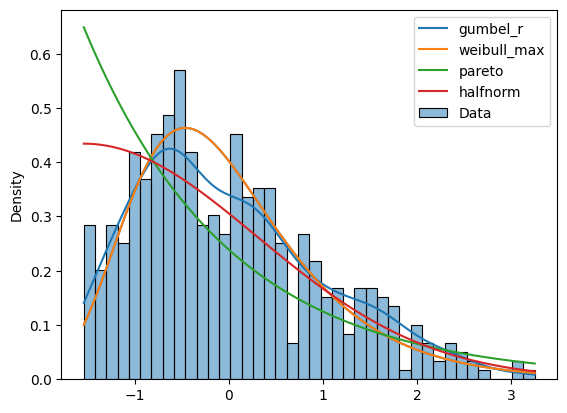

Distribution: gumbel_r
  Params: (np.float64(-0.4655556561127374), 0.8043592365298379)
  KS Statistic: 0.04225452494783902
  KS p-value: 0.3270462641293578

Distribution: weibull_max
  Params: (np.float64(0.70734494462435), np.float64(3.495017008237349), np.float64(1.257774132038508))
  KS Statistic: 0.6770580551231722
  KS p-value: 1.5741452358451498e-226

Distribution: pareto
  Params: (np.float64(41218538.38324483), np.float64(-67108865.62812336), 67108864.0)
  KS Statistic: 0.16762770819428033
  KS p-value: 1.0619042277286903e-12

Distribution: halfnorm
  Params: (np.float64(-1.6281233563774309), np.float64(1.9107029239475484))
  KS Statistic: 0.10465361654061064
  KS p-value: 3.339093587543999e-05

Best distribution: gumbel_r with AIC: 1359.6370894662543


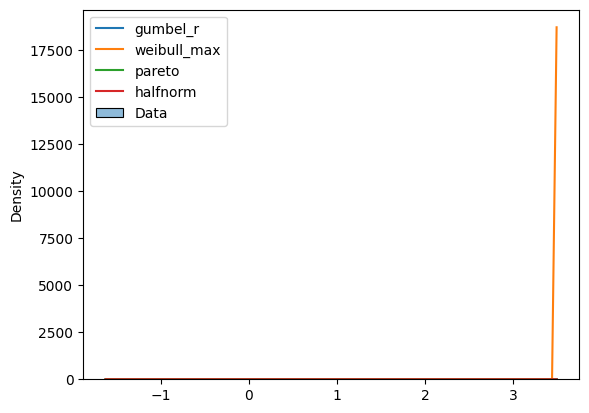

Distribution: gumbel_r
  Params: (np.float64(-0.45275377922650767), 0.819621780539911)
  KS Statistic: 0.0451517423390464
  KS p-value: 0.2542204907211616

Distribution: weibull_max
  Params: (np.float64(19.72870495921351), np.float64(15.865314800710522), np.float64(16.295633611376545))
  KS Statistic: 0.035315972504728954
  KS p-value: 0.5515636623533653

Distribution: pareto
  Params: (np.float64(237224585.83226576), np.float64(-536870914.2631335), np.float64(536870911.99999994))
  KS Statistic: 0.31159415342458885
  KS p-value: 1.8794387544482955e-43

Distribution: halfnorm
  Params: (np.float64(-2.2631335434705337), np.float64(2.474221783830523))
  KS Statistic: 0.27222570177033706
  KS p-value: 4.265486795649412e-33

Best distribution: weibull_max with AIC: 1350.1388759682766


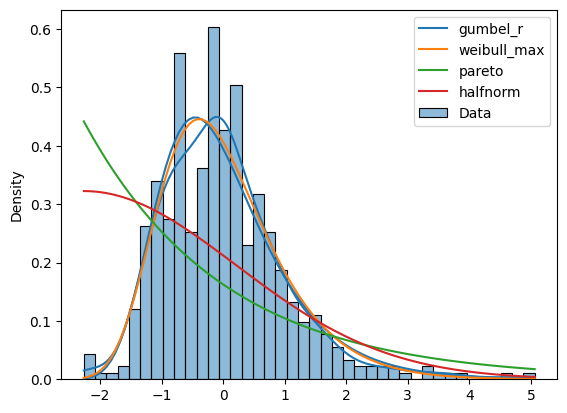

Distribution: gumbel_r
  Params: (np.float64(-0.46343053897610903), 0.8368380563698348)
  KS Statistic: 0.05509272269557963
  KS p-value: 0.09371785298302882

Distribution: weibull_max
  Params: (np.float64(14.31027063165301), np.float64(11.726259354292523), np.float64(12.157739724923777))
  KS Statistic: 0.040747099892054994
  KS p-value: 0.3700860696436612

Distribution: pareto
  Params: (np.float64(115650217.44479844), np.float64(-268435458.3210976), np.float64(268435455.99999982))
  KS Statistic: 0.30305495227256607
  KS p-value: 4.4580287890044806e-41

Distribution: halfnorm
  Params: (np.float64(-2.321097751468724), np.float64(2.527349356909956))
  KS Statistic: 0.26348759913534425
  KS p-value: 5.310074835212972e-31

Best distribution: weibull_max with AIC: 1370.3310776754122


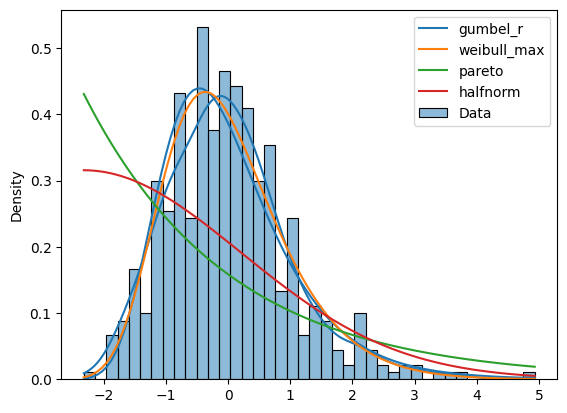

In [47]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# # Sample data
# data = scaler.fit_transform(
#     dts)[:, 2]  #np.random.normal(loc=0, scale=1, size=1000)

# List of distributions to test
distributions = ['gumbel_r', 'weibull_max', 'pareto', 'halfnorm']

# Store results
results = {}
for i in range(dts.shape[1]):
    data = scaler.fit_transform(
        dts)[:, i]  #np.random.normal(loc=0, scale=1, size=1000)

    # Fit and test distributions
    for dist_name in distributions:
        dist = getattr(stats, dist_name)
        params = dist.fit(data)

        # Perform the K-S test
        ks_stat, ks_p_value = stats.kstest(data, dist_name, args=params)

        # AIC and BIC
        log_likelihood = np.sum(dist.logpdf(data, *params))
        aic = 2 * len(params) - 2 * log_likelihood
        bic = len(params) * np.log(len(data)) - 2 * log_likelihood

        # if ks_p_value < 0.05:
        #     continue
        # Store results
        results[dist_name] = {
            'params': params,
            'ks_stat': ks_stat,
            'ks_p_value': ks_p_value,
            'aic': aic,
            'bic': bic
        }

    if not results: continue

    # Find the best distribution based on AIC
    best_dist = min(results, key=lambda x: results[x]['aic'])

    # Print results
    for dist_name, result in results.items():
        print(f"Distribution: {dist_name}")
        print(f"  Params: {result['params']}")
        print(f"  KS Statistic: {result['ks_stat']}")
        print(f"  KS p-value: {result['ks_p_value']}")

        print()

    print(
        f"Best distribution: {best_dist} with AIC: {results[best_dist]['aic']}"
    )

    # Visual comparison
    sns.histplot(data, kde=True, stat="density", bins=40, label='Data')

    x = np.linspace(min(data), max(data), 100)
    for dist_name in distributions:
        dist = getattr(stats, dist_name)
        params = results[dist_name]['params']
        plt.plot(x, dist.pdf(x, *params), label=dist_name)
        # plt.title(dt)

    plt.legend()
    plt.show()
    print('==========================')


In [45]:
shape, loc, scale = stats.pareto.fit(data)

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()

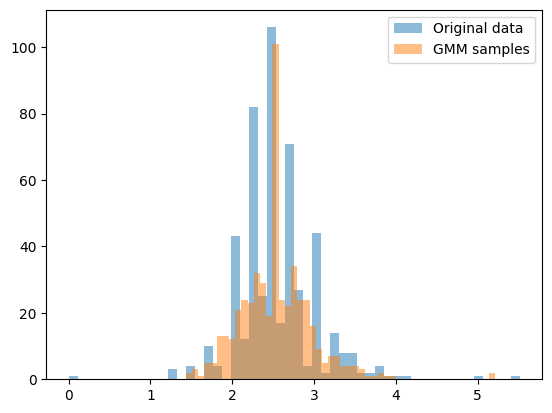

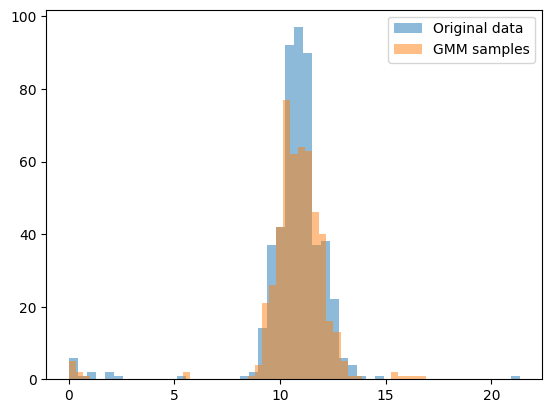

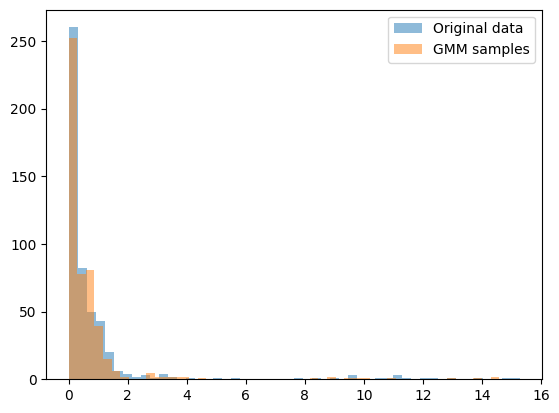

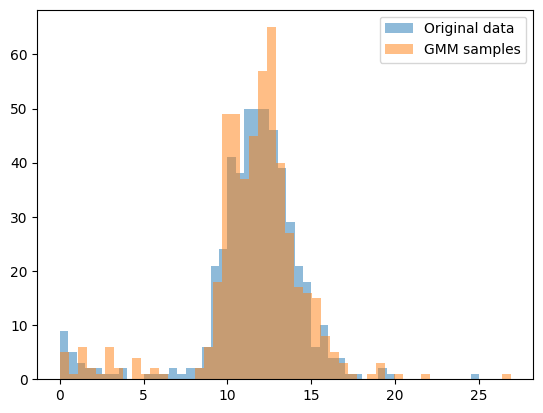

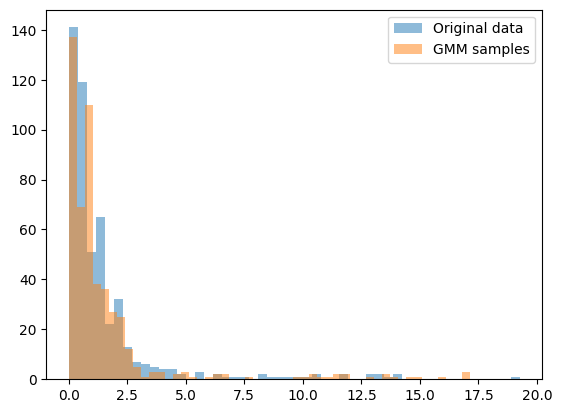

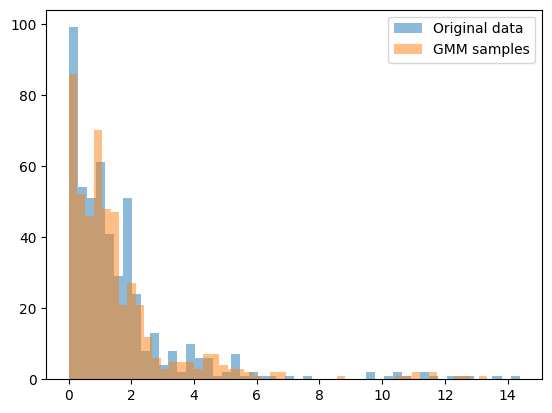

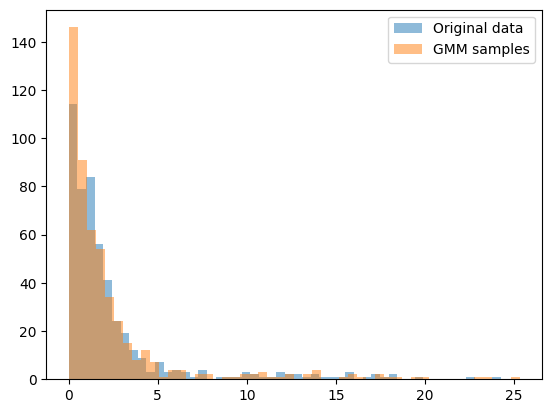

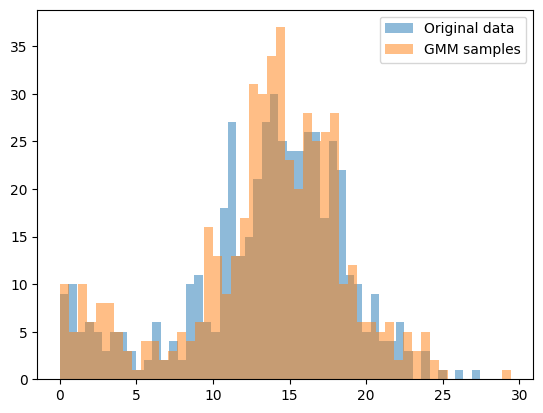

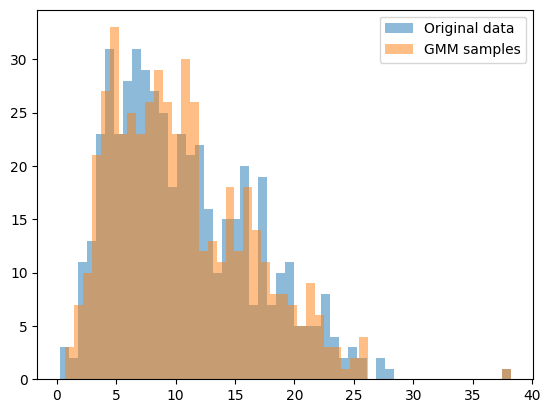

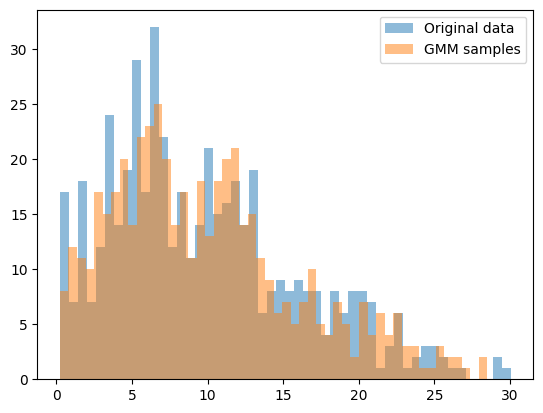

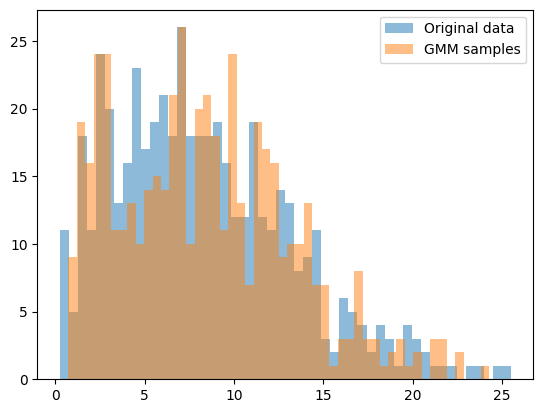

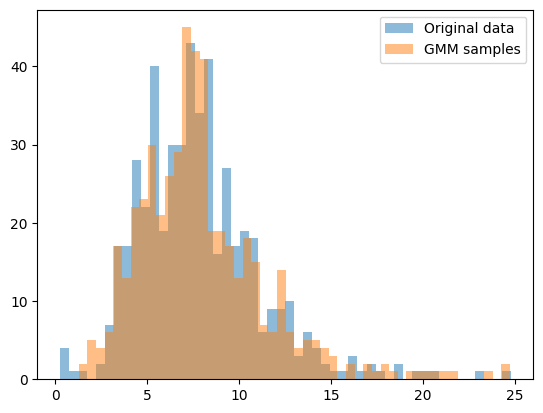

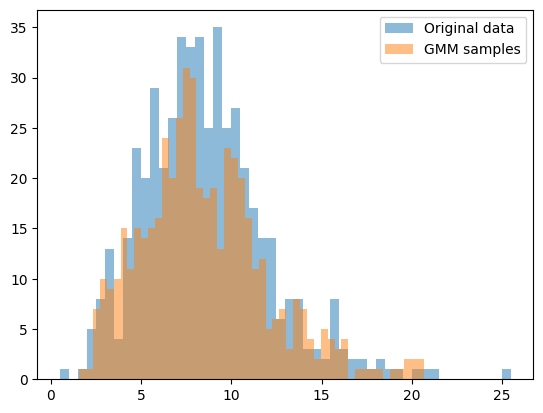

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Replace this with your actual data
for i in range(dts.shape[1]):
    # data = scaler.fit_transform(
    #     dts)[:, i]  #np.random.normal(loc=0, scale=1, size=1000)
    data = dts.values[:, i]
    # Reshape the data to fit the GMM
    data = data.reshape(-1, 1)

    # Fit a Gaussian Mixture Model with 2 components (for bimodal distribution)
    gmm = GaussianMixture(n_components=5)
    gmm.fit(data)

    # Generate samples from the fitted GMM
    n_samples = len(data)  # Number of samples you want to generate
    gmm_samples, _ = gmm.sample(n_samples)

    # Flatten the samples array for plotting
    gmm_samples = gmm_samples.flatten()
    gmm_samples[gmm_samples < data.min()] = data.min()
    # Plot the original histogram
    plt.hist(data, bins=50, alpha=0.5, label='Original data')

    # Plot the histogram of GMM samples
    plt.hist(gmm_samples, bins=50, alpha=0.5, label='GMM samples')

    # Add legend and show the plot
    plt.legend()
    plt.show()


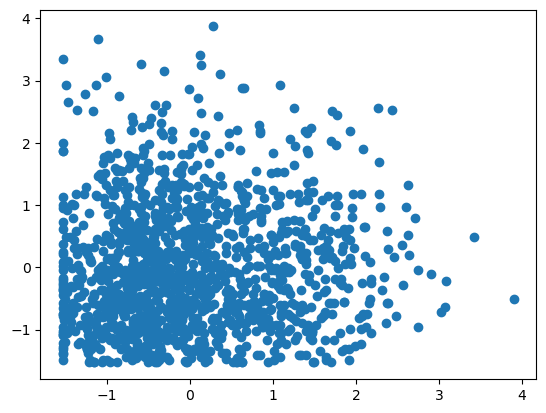

In [48]:
plt.scatter(gmm_samples, data)

In [49]:
shape, loc, scale = stats.pareto.fit(data)

In [50]:
pareto_samples = (np.random.pareto(shape, 1000) + loc) * scale

(array([ 74.,  48.,  68.,  79., 116., 136., 115., 112.,  91.,  80.,  63.,
         59.,  45.,  48.,  56.,  35.,  41.,  32.,  26.,  21.,  12.,  11.,
          7.,   4.,   1.,   3.,   0.,   1.,   0.,   1.]),
 array([-1.52929443, -1.34835519, -1.16741595, -0.9864767 , -0.80553746,
        -0.62459821, -0.44365897, -0.26271973, -0.08178048,  0.09915876,
         0.280098  ,  0.46103725,  0.64197649,  0.82291573,  1.00385498,
         1.18479422,  1.36573347,  1.54667271,  1.72761195,  1.9085512 ,
         2.08949044,  2.27042968,  2.45136893,  2.63230817,  2.81324741,
         2.99418666,  3.1751259 ,  3.35606515,  3.53700439,  3.71794363,
         3.89888288]),
 <BarContainer object of 30 artists>)

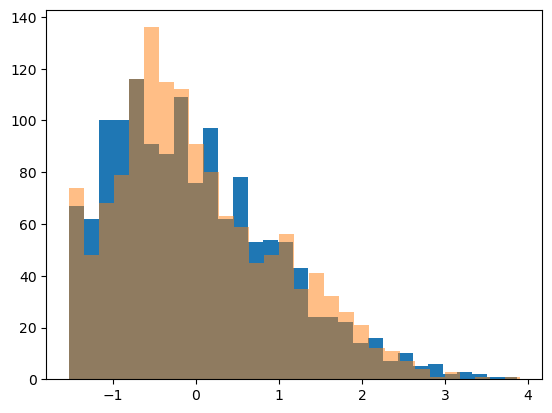

In [51]:
plt.hist(data, bins=30)
# plt.hist(pareto_samples, bins=50)
plt.hist(gmm_samples, bins=30, alpha=0.5, label='GMM samples')

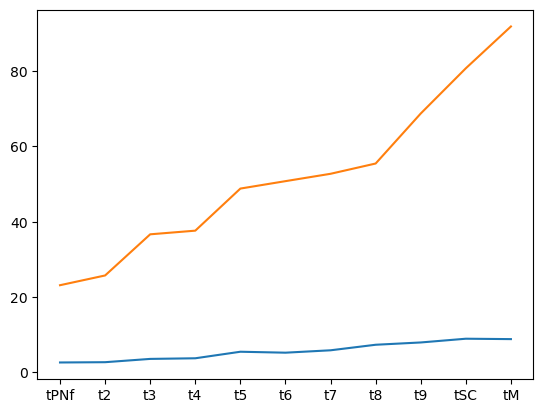

In [52]:
plt.plot(relevant_t_df[basic_time_cols].T.std(axis=1))
plt.plot(relevant_t_df[basic_time_cols].T.mean(axis=1))

<Axes: >

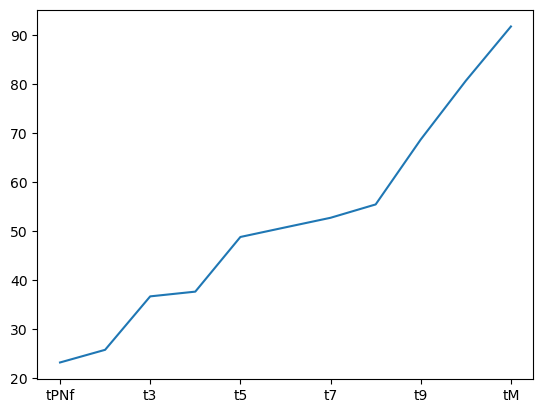

In [53]:
relevant_t_df[basic_time_cols].T.mean(axis=1).plot(legend=False)

In [54]:
times_mean = relevant_t_df[basic_time_cols].T.mean(axis=1)

times_std = relevant_t_df[basic_time_cols].T.std(axis=1)

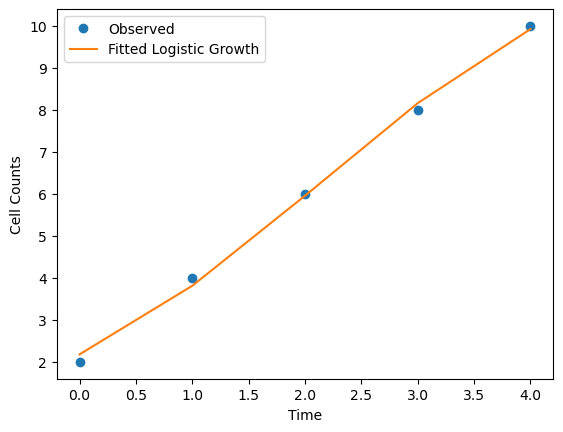

Estimated parameters: N0 = 2.1799441020777732, K = 12.402686124888424, r = 0.7332826757599898


In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example data: replace this with your cleavage times data
time = np.array([
    0,
    1,
    2,
    3,
    4,
])
cell_counts = np.array([2, 4, 6, 8, 10])


# Logistic growth function
def logistic_growth(t, N0, K, r):
    return K / (1 + (K - N0) / N0 * np.exp(-r * t))


# Initial guess for parameters
initial_guess = [cell_counts[0], max(cell_counts), 0.1]

# Fit the logistic model to the data
params, covariance = curve_fit(logistic_growth,
                               time,
                               cell_counts,
                               p0=initial_guess)

# Extract the parameters
N0, K, r = params

# Predict the cell counts
predicted_counts = logistic_growth(time, N0, K, r)

# Plot the results
plt.plot(time, cell_counts, 'o', label='Observed')
plt.plot(time, predicted_counts, '-', label='Fitted Logistic Growth')
plt.xlabel('Time')
plt.ylabel('Cell Counts')
plt.legend()
plt.show()

print(f"Estimated parameters: N0 = {N0}, K = {K}, r = {r}")


In [54]:
relevant_t_df

,tPNf,t2,t3,t4,t5,t6,t7,t8,t9,tSC,tM,tSB,tB,tEB
3585,22.689812,25.695232,36.701044,36.701044,49.490146,52.209086,54.215567,54.215567,73.067395,78.964570,92.076331,98.078473,106.083641,113.425117
3587,19.881342,22.699994,32.372906,33.379695,45.755255,47.425621,49.500475,52.216164,66.895648,71.334685,83.305972,94.089967,102.423391,111.428245
3588,21.030148,23.700807,33.383267,33.383267,45.758788,46.759201,47.961225,48.961539,61.898154,69.240302,90.087167,99.089247,99.759743,113.435756
3589,20.371336,22.707124,33.386809,34.050195,45.093361,51.886741,53.235964,53.896361,64.578643,73.087997,91.096793,100.096578,109.098513,115.768924
4038,26.342698,29.346494,39.678736,40.012048,50.353964,50.687376,51.694192,51.694192,72.975035,90.928793,104.606982,107.267922,111.606395,116.274354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26341,22.849985,24.852976,37.112479,37.112479,49.726131,50.476789,50.979256,54.227711,67.488190,74.276442,76.277114,90.782034,102.038373,110.040801
26344,23.358856,25.611857,35.863253,35.863253,46.731583,46.983082,48.734890,51.235137,60.240082,63.991437,71.030361,85.538566,91.540789,98.545037
26412,20.983840,23.484514,35.238464,35.488707,47.496901,47.496901,47.820905,53.385599,63.888028,79.643497,85.395614,86.896236,98.258690,107.511347
26413,21.736381,24.237282,36.741386,36.741386,52.385430,52.888203,54.636539,63.139996,70.392696,78.145952,83.647561,90.650440,98.261288,108.514830


In [89]:
correlations = zoe[basic_time_cols].corr()

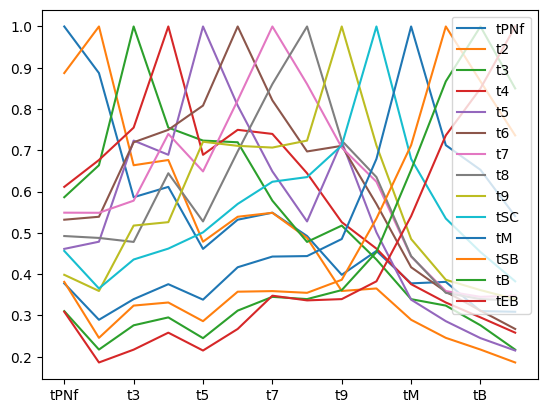

In [90]:
for c in relevant_t_df.columns:
    correlations[c].plot()

plt.legend(relevant_t_df.columns)

array([2.24872142, 2.32142974, 3.10718387, 3.35221966, 4.59107386,
       4.66627672, 5.05921526, 6.33871157, 6.35940998, 7.55051904,
       7.04258665, 6.06155439, 6.45408413, 6.82197501])

In [116]:
import numpy as np
from numpy.random import multivariate_normal

# Example means and standard deviations for the time intervals
means = zoe[basic_time_cols].dropna(
    thresh=10).mean().values  # Replace with actual means
std_devs = zoe[basic_time_cols].dropna(thresh=10).std().values

# Correlation matrix (from your data)
correlations = zoe[basic_time_cols].dropna(thresh=10).corr()

# Convert standard deviations to a covariance matrix
std_devs = np.array(std_devs)
covariance_matrix = correlations.values * np.outer(std_devs, std_devs)

# Generate samples from the multivariate normal distribution
samples = multivariate_normal(means, covariance_matrix, size=1000)


/var/folders/gb/2dm73f1s22n8755ydqgrblxw0000gn/T/ipykernel_29254/1077931939.py:17: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = multivariate_normal(means, covariance_matrix, size=1000)


In [117]:
zoe[basic_time_cols].dropna(thresh=10)

,tPNf,t2,t3,t4,t5,t6,t7,t8,t9,tSC,tM,tSB,tB,tEB
216,20.653786,22.999868,32.657390,32.990876,45.994050,45.994050,45.994050,46.672827,64.664668,66.939091,NaN,NaN,NaN,NaN
231,21.041068,23.708333,34.383240,35.377251,45.713318,46.046656,46.046656,46.046656,47.713802,65.050958,NaN,NaN,NaN,NaN
232,19.059129,21.380834,32.049669,32.395498,42.057979,42.718805,43.058258,43.385581,57.394993,66.390821,NaN,NaN,NaN,NaN
692,17.264499,19.598040,29.609938,29.937035,40.942657,41.600080,41.600080,41.600080,58.270941,75.860904,NaN,NaN,NaN,NaN
2145,19.575960,22.579859,32.581758,32.915096,44.587905,44.918075,45.248375,63.919691,66.253882,66.587306,73.049720,84.733841,94.070006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26471,20.816126,23.652303,33.412267,35.163562,44.166367,45.416590,46.166969,47.667429,59.993192,86.010681,92.301210,94.049713,106.121002,113.128722
26495,19.414865,21.665836,32.103226,32.851469,43.608092,44.358461,44.358461,46.168998,63.463529,67.469239,85.337259,NaN,NaN,NaN
26496,21.918460,23.919345,34.857037,37.856694,47.173240,47.689306,51.703197,54.209854,67.471690,70.582264,75.333500,NaN,NaN,NaN
26497,25.604178,28.101597,38.609261,39.111130,51.458037,51.458037,52.959603,53.959947,67.474286,69.834081,72.335297,NaN,NaN,NaN


(array([ 1.,  2.,  0.,  3.,  1.,  1.,  2.,  1.,  6.,  0.,  4., 12.,  9.,
        19., 18.,  8., 13., 18., 22., 20., 35., 29., 34., 37., 30., 32.,
        32., 54., 51., 50., 50., 50., 41., 50., 49., 51., 44., 42., 55.,
        44., 45., 59., 39., 53., 49., 45., 51., 44., 51., 38., 45., 38.,
        24., 23., 14., 11.,  7.,  6.,  7.,  7.,  5.,  5.,  0.,  4.,  4.,
         3.,  1.,  0.,  1.,  3.,  0.,  1.,  1.,  2.,  0.,  1.,  2.,  1.,
         2.,  1.,  3.,  2.,  1.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.]),
 array([ 86.54966472,  87.1052255 ,  87.66078628,  88.21634705,
         88.77190783,  89.32746861,  89.88302939,  90.43859016,
         90.99415094,  91.54971172,  92.1052725 ,  92.66083328,
         93.21639405,  93.77195483,  94.32751561,  94.88307639,
         95.43863716,  95.99419794,  96.54975872,  97.1053195 ,
         97.66088028,  98.21644105,  98.77200183,  99.32756261,
         99.88312339, 100.43868416, 100.99424494, 

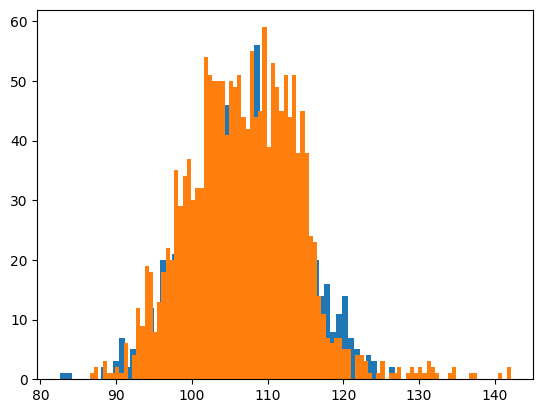

In [120]:
plt.hist(samples[:, 12], bins=60)
plt.hist(zoe[basic_time_cols].dropna(thresh=10).values[:, 12], bins=100)


In [57]:
 np.corrcoef((relevant_t_df[basic_time_cols].values -
                 relevant_t_df['tPNf'].values[:, None]).transpose(1, 0))[:,4]

/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([       nan, 0.17554669, 0.57938124, 0.43693468, 1.        ,
       0.70301695, 0.54093263, 0.40033278, 0.68144268, 0.3229653 ,
       0.12374497])

<Axes: >

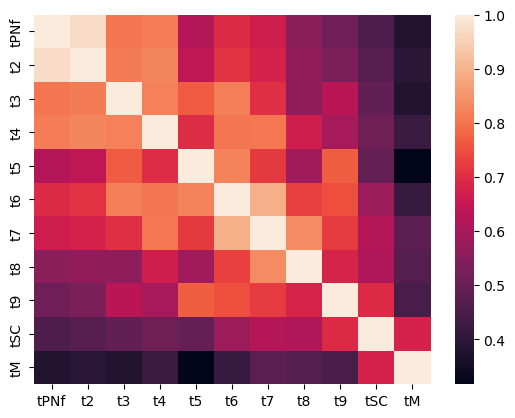

In [58]:
sns.heatmap(relevant_t_df.corr())

array([[<Axes: title={'center': 'dt_0'}>,
        <Axes: title={'center': 'dt_1'}>,
        <Axes: title={'center': 'dt_2'}>],
       [<Axes: title={'center': 'dt_3'}>,
        <Axes: title={'center': 'dt_4'}>,
        <Axes: title={'center': 'dt_5'}>],
       [<Axes: title={'center': 'dt_6'}>,
        <Axes: title={'center': 'dt_7'}>,
        <Axes: title={'center': 'dt_8'}>],
       [<Axes: title={'center': 'dt_9'}>, <Axes: >, <Axes: >]],
      dtype=object)

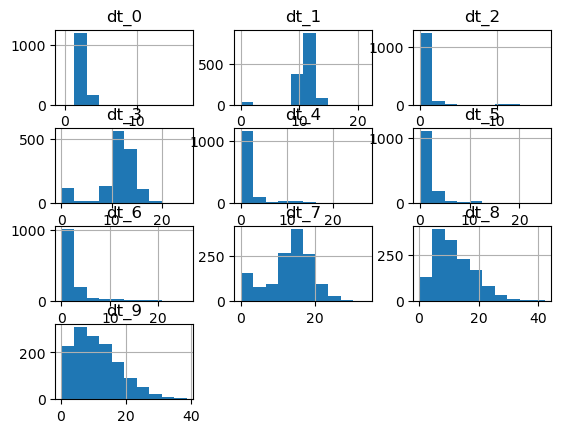

In [59]:
dts.hist()

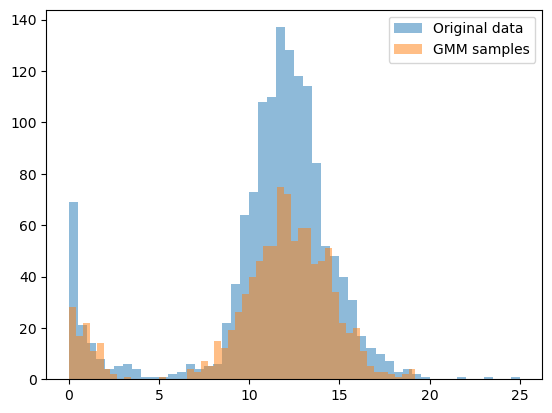

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Replace this with your actual data
data = dts['dt_3'].values

# Reshape the data to fit the GMM
data = data.reshape(-1, 1)

# Fit a Gaussian Mixture Model with 2 components (for bimodal distribution)
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# Generate samples from the fitted GMM
n_samples = 1000  # Number of samples you want to generate
gmm_samples, _ = gmm.sample(n_samples)

# Flatten the samples array for plotting
gmm_samples = gmm_samples.flatten()
gmm_samples[gmm_samples < 0] = 0
# Plot the original histogram
plt.hist(data, bins=50, alpha=0.5, label='Original data')

# Plot the histogram of GMM samples
plt.hist(gmm_samples, bins=50, alpha=0.5, label='GMM samples')

# Add legend and show the plot
plt.legend()
plt.show()


In [61]:
import seaborn as sns
from scipy import stats

In [62]:
gumbel = stats.distributions.gumbel_l()
normal = stats.distributions.norm()

In [63]:
np.corrcoef(relevant_t_df[['tPNf', 't8']].values[:, 0],
            relevant_t_df[['tPNf', 't8']].values[:, 1])

array([[1.        , 0.55217725],
       [0.55217725, 1.        ]])

In [64]:
a_var = 'tPNf'
b_var = 't8'

x_a = relevant_t_df[a_var].values
x_b = relevant_t_df[b_var].values

mu_a = x_a.mean()
sigma_a = x_a.std()

mu_b = x_b.mean()
sigma_b = x_b.std()

x_a_scaled = (x_a - mu_a) / sigma_a
x_b_scaled = (x_b - mu_b) / sigma_b

marginal_a = normal.cdf(x_a_scaled)

marginal_b = normal.cdf(x_b_scaled)

In [65]:
cov_matrix = np.cov([x_a_scaled, x_b_scaled])

In [66]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=cov_matrix)
# Generate random samples from multivariate normal with correlation .5
x = mvnorm.rvs(40000)


/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

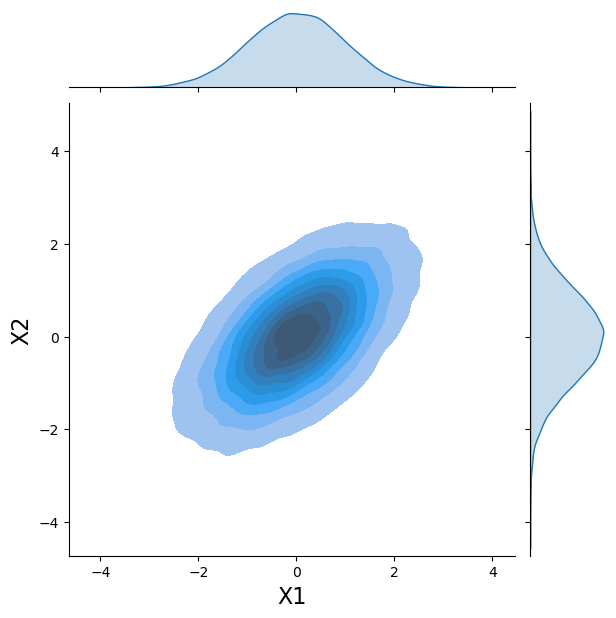

In [67]:
h = sns.jointplot(x=x[:, 0], y=x[:, 1], kind='kde', fill=True)
h.set_axis_labels('X1', 'X2', fontsize=16)

In [68]:
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=2)

x1_trans = norm.ppf(marginal_a)
x2_trans = norm.ppf(marginal_b)

h = sns.jointplot(x=x[:, 0], y=x[:, 1], kind='kde', fill=True)
h.set_axis_labels('X1', 'X2', fontsize=16)

h = sns.jointplot(x=x1_trans,
                  y=x2_trans,
                  kind='kde',
                  fill=True
                  #   xlim=(-6, 2),
                  #   ylim=(.6, 1.0)
                  )

NameError: name 'norm' is not defined

In [ ]:
import numpy as np
from scipy.stats import norm
from copulas.multivariate import GaussianMultivariate
from copulas.visualization import scatter_2d

# Example empirical data
data = np.random.normal(size=(1000, 2))

# Transform data to uniform [0,1] marginals using the empirical CDF
uniform_data = np.column_stack([marginal_a, marginal_b])

# Fit a Gaussian copula to the uniform marginals
copula = GaussianMultivariate()
copula.fit(uniform_data)

# Generate new samples from the fitted copula
n_samples = 40000
samples = copula.sample(n_samples)

# The samples are from the Gaussian copula and have uniform marginals
print(samples)


/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6338: RuntimeWarning:

divide by zero encountered in divide

/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6338: RuntimeWarning:

divide by zero encountered in divide



              0         1
0      0.824163  0.546115
1      0.076809  0.366132
2      0.648978  0.578638
3      0.360847  0.226449
4      0.734399  0.571056
...         ...       ...
39995  0.198918  0.260028
39996  0.271467  0.324541
39997  0.428976  0.518405
39998  0.036060  0.864120
39999  0.069727  0.403062

[40000 rows x 2 columns]


In [ ]:
x1_trans = norm.ppf(samples[0])
x2_trans = norm.ppf(samples[1])

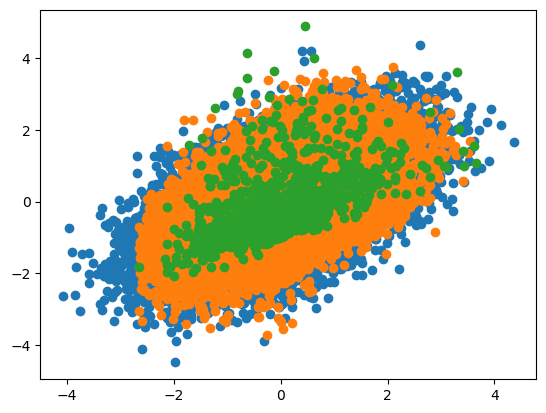

In [ ]:
plt.scatter(x=x[:, 0], y=x[:, 1])
plt.scatter(x1_trans, x2_trans)
plt.scatter(x_a_scaled, x_b_scaled)
#

/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/homebrew/anaconda3/envs/pymc_env/lib/python

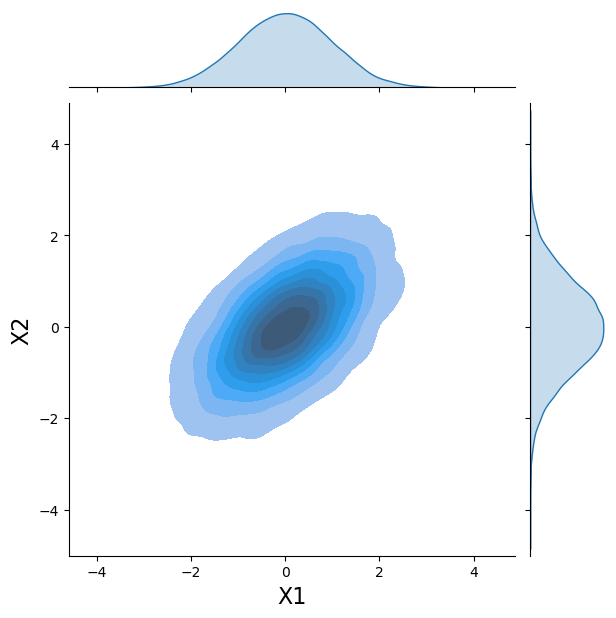

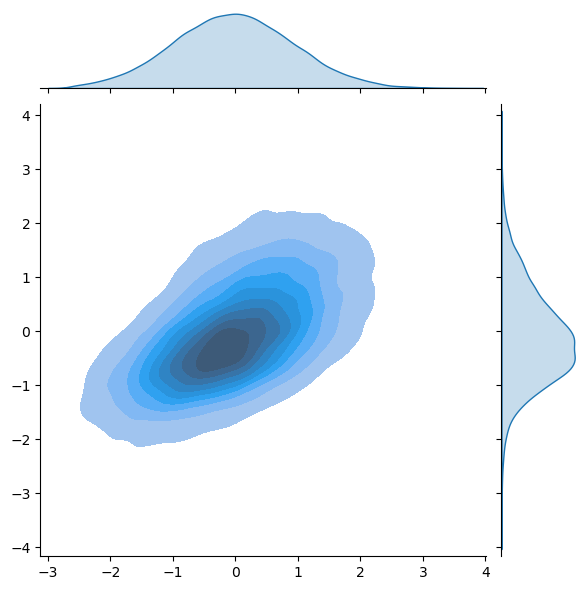

In [ ]:
h = sns.jointplot(x=x[:, 0], y=x[:, 1], kind='kde', fill=True)
h.set_axis_labels('X1', 'X2', fontsize=16)

h = sns.jointplot(x=x1_trans,
                  y=x2_trans,
                  kind='kde',
                  fill=True
                  #   xlim=(-6, 2),
                  #   ylim=(.6, 1.0)
                  )

In [ ]:
copula.covariance_matrix

AttributeError: 'GaussianMultivariate' object has no attribute 'covariance_matrix'

In [69]:
x = zoe['t5'].dropna().values

mu = x.mean()
sigma = x.std()
standardized_x = (x - mu) / sigma

x_uniform = normal.cdf(standardized_x)

In [70]:
x_trans_trans = gumbel.cdf(x_trans)
h = sns.jointplot(x_trans, x_trans_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16)

NameError: name 'x_trans' is not defined

/var/folders/gb/2dm73f1s22n8755ydqgrblxw0000gn/T/ipykernel_6567/1660663743.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_trans)
/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  retur

<Axes: >

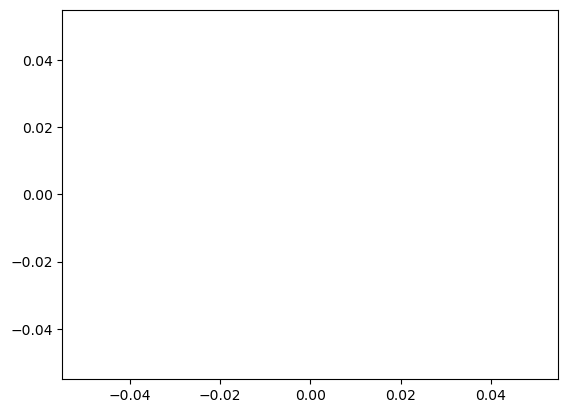

In [71]:
norm = stats.distributions.norm()
x_trans = norm.ppf(x)
sns.distplot(x_trans)

/opt/homebrew/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


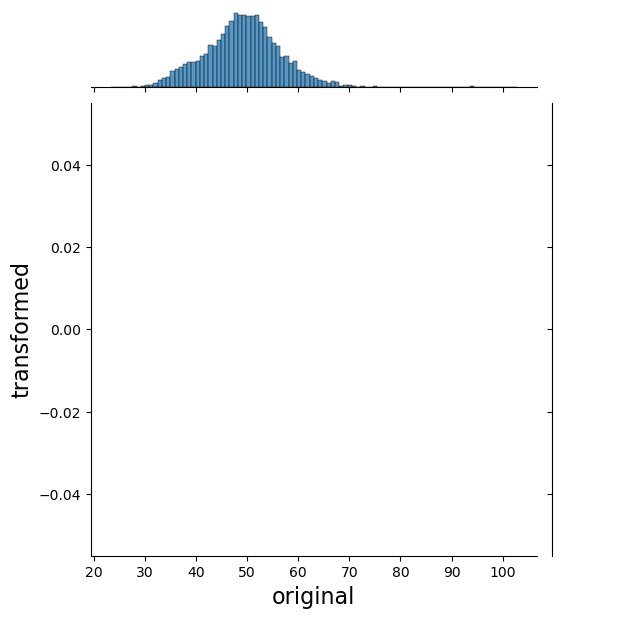

In [72]:
h = sns.jointplot(x=x, y=x_trans)
h.set_axis_labels('original', 'transformed', fontsize=16)

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


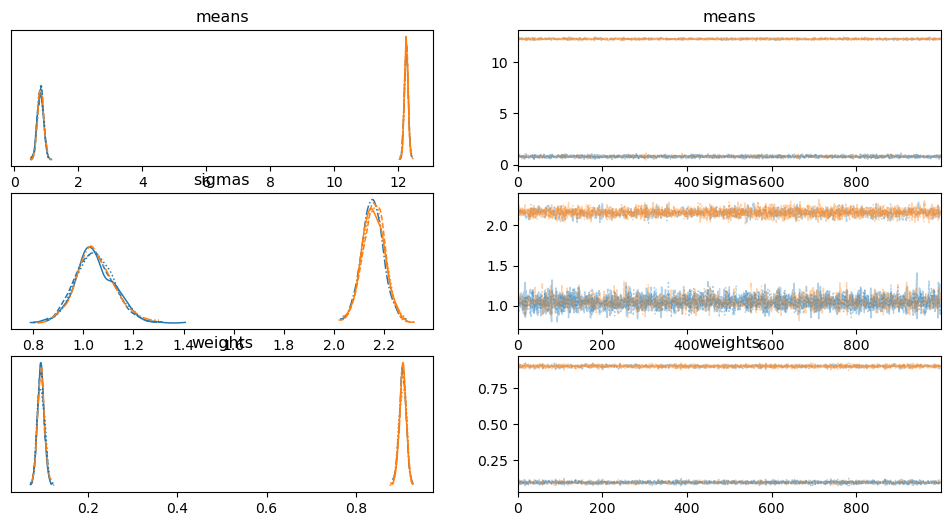

In [73]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import jax

# # Ensure JAX uses the MPS backend
# jax.config.update("jax_platform_name", "cpu")
# if jax.lib.xla_bridge.get_backend().platform == "cpu":
#     print("JAX is running on CPU, attempting to switch to MPS...")
#     jax.config.update("jax_platform_name", "mps")

# Example data for dt3
dt3_data = dts['dt_3'].values.flatten()  # Replace with your actual dt3 data

# Define the number of components in the mixture for dt3
n_components = 2

with pm.Model() as model:
    # Priors for dt2
    # dt2_mu = pm.Normal('dt2_mu',
    #                    mu=dts['dt_2'].mean(),
    #                    sigma=dts['dt_2'].std())
    # dt2_sigma = pm.HalfNormal('dt2_sigma', sigma=dts['dt_2'].std())
    # dt2 = pm.Normal('dt2', mu=dt2_mu, sigma=dt2_sigma)

    # Priors for mixture weights of dt3
    weights = pm.Dirichlet('weights', a=np.ones(n_components))

    # Priors for component means and standard deviations of dt3
    means = pm.Normal('means',
                      mu=np.mean(dt3_data),
                      sigma=5,
                      shape=n_components)

    sigmas = pm.HalfNormal('sigmas', sigma=5, shape=n_components)

    # Likelihood for dt3
    dt3 = pm.NormalMixture('dt3',
                           w=weights,
                           mu=means,
                           sigma=sigmas,
                           observed=dt3_data)

    # Priors for dt4 conditional on dt3
    # dt4_mu = pm.Deterministic('dt4_mu', dt3 + 2)
    # dt4_sigma = pm.HalfNormal('dt4_sigma', sigma=5)
    # dt4 = pm.Normal('dt4', mu=dt4_mu, sigma=dt4_sigma)

    # # Priors for dt5 conditional on dt4
    # dt5_mu = pm.Deterministic('dt5_mu', dt4 + 2)
    # dt5_sigma = pm.HalfNormal('dt5_sigma', sigma=5)
    # dt5 = pm.Normal('dt5', mu=dt5_mu, sigma=dt5_sigma)

    # # Continue this process for dt6, dt7, and dt8
    # dt6_mu = pm.Deterministic('dt6_mu', dt5 + 2)
    # dt6_sigma = pm.HalfNormal('dt6_sigma', sigma=5)
    # dt6 = pm.Normal('dt6', mu=dt6_mu, sigma=dt6_sigma)

    # dt7_mu = pm.Deterministic('dt7_mu', dt6 + 2)
    # dt7_sigma = pm.HalfNormal('dt7_sigma', sigma=5)
    # dt7 = pm.Normal('dt7', mu=dt7_mu, sigma=dt7_sigma)

    # dt8_mu = pm.Deterministic('dt8_mu', dt7 + 2)
    # dt8_sigma = pm.HalfNormal('dt8_sigma', sigma=5)
    # dt8 = pm.Normal('dt8', mu=dt8_mu, sigma=dt8_sigma)

    # Inference using JAX sampler with MPS backend
    trace = pm.sample(1000,
                      return_inferencedata=True,
                      random_seed=42,
                      nuts_sampler='numpyro')

# Plot the results
az.plot_trace(trace)
plt.show()


In [74]:
# Generate posterior predictive samples
with model:
    posterior_predictive = pm.sample_posterior_predictive(
        trace, var_names=["dt2", "dt3", "dt4", "dt5", "dt6", "dt7", "dt8"])

# Plot the histograms of the generated samples
plt.figure(figsize=(15, 10))
for i, dt in enumerate(['dt2', 'dt3', 'dt4', 'dt5', 'dt6', 'dt7', 'dt8'], 1):
    plt.subplot(4, 2, i)
    plt.hist(posterior_predictive[dt],
             bins=50,
             alpha=0.5,
             label=f'Simulated {dt}',
             density=True)
    plt.legend()

plt.tight_layout()
plt.show()


KeyError: 'dt2'

In [75]:
full_metadata = pd.read_excel('../data/all_pgt.xlsx')

In [76]:
full_metadata.columns

Index([              'A/A',        'Patient ID',           'OR DATE',
          'Indication PGT',               'Age',        'Embryo no.',
           'Day 3 Scoring',             'Grade',              'Frag',
           'Day of biopsy',        'PGT RESULT', 'Sesgregation PGTA',
             'Class_Grade',    'SUBGROUPS OF 0',  'Suggested for ET',
                         1,                   2,                   3,
                         4,                   5,                   6,
                         7,                   8,                   9,
                        10,                  11,                  12,
                        13,                  14,                  15,
                        16,                  17,                  18,
                        19,                  20,                  21,
                        22,                 'X',                 'Y',
       'livebirth/ongoing',       'Transferred'],
      dtype='object')

In [77]:
full_metadata[4].value_counts()

4
2                              1985
1                                73
3                                52
2                                49
 -4q                             14
0                                 9
 +4q                              6
 -4p                              6
 -                                6
NR                                4
  - 4q                            3
3                                 3
1                                 3
mos1                              2
N/R                               2
NOR                               2
 +4p/-4q                          2
4                                 1
mosaic -4q                        1
4                                 1
mos3                              1
mos 3                             1
duplication 4p, deletion 4q       1
 +4q mosaic                       1
n/r                               1
mos -1                            1
mosaic trisomy                    1
mosaic monosomy           

In [78]:
full_metadata[[
    1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
    22, 'X', 'Y'
]]


,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,X,Y
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,1
1,2,mos +2q,2,2,2,2,2,2,2,2,...,2,2,2,2,2,1,2,2,2,0
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,1,1
3,mos +1,2,2,2,mos -5,2,2,mos +8,mos +9,mos -10,...,2,2,2,mos +18,mos -19,mos +20,2,2,2,0
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,2,2,2,-4q,2,2,2,2,3,2,...,2,2,2,2,2,2,2,2,1,1
2324,1,1,2,2,2,0,3,2,3,2,...,3,2,1,1,2,1,2,1,1,0
2325,3,3,2,2,2,2,1,1,0,0,...,3,1,0,0,0,2,2,4,1,1
2326,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,3,2,2,1


In [79]:
full_data = pd.read_csv('../data/area_extracted_feats.csv')

timesteps = pd.read_csv('../data/grade_timesteps.csv')

In [80]:
pgt_df = pd.read_csv('../data/big_pgt_df.csv')

del pgt_df['Patient Name']

In [81]:
pgt_df['id'] = pgt_df['Slide ID'] + '_' + pgt_df['Well'].astype(str)

In [108]:
timesteps

,id,dt
0,D2018.04.21_S01773_I0149_D_9,0.013425
1,D2018.04.21_S01773_I0149_D_9,0.024170
2,D2018.04.21_S01773_I0149_D_9,0.034594
3,D2018.04.21_S01773_I0149_D_9,0.045023
4,D2018.04.21_S01773_I0149_D_9,0.055439
...,...,...
1195354,D2016.02.08_S1220_I149_7,4.786479
1195355,D2016.02.08_S1220_I149_7,4.793438
1195356,D2016.02.08_S1220_I149_7,4.800382
1195357,D2016.02.08_S1220_I149_7,4.807327


In [259]:
sample_embryos = full_data[['id']].drop_duplicates(subset=['id']).sample(n=1)
sample_data = pd.merge(full_data, sample_embryos, on='id', how='right')
sample_t = timesteps.loc[timesteps['id'] ==
                         sample_data['id'].iloc[0]]['dt'].values * 24

sample_metadata = zoe.loc[zoe['id'] ==
                          sample_data['id'].iloc[0]][time_cols_all]

In [260]:
zoe['id'] = zoe['Slide ID'] + "_" + zoe['Well'].astype(str)

In [261]:
sample_ids = [
    "D2017.09.15_S1620_I149_8", "D2016.10.08_S1407_I149_5",
    "D2019.01.25_S01939_I0149_D_1"
]

In [262]:
sample_data['id']

0      D2016.10.15_S1415_I149_10
1      D2016.10.15_S1415_I149_10
2      D2016.10.15_S1415_I149_10
3      D2016.10.15_S1415_I149_10
4      D2016.10.15_S1415_I149_10
                 ...            
454    D2016.10.15_S1415_I149_10
455    D2016.10.15_S1415_I149_10
456    D2016.10.15_S1415_I149_10
457    D2016.10.15_S1415_I149_10
458    D2016.10.15_S1415_I149_10
Name: id, Length: 459, dtype: object

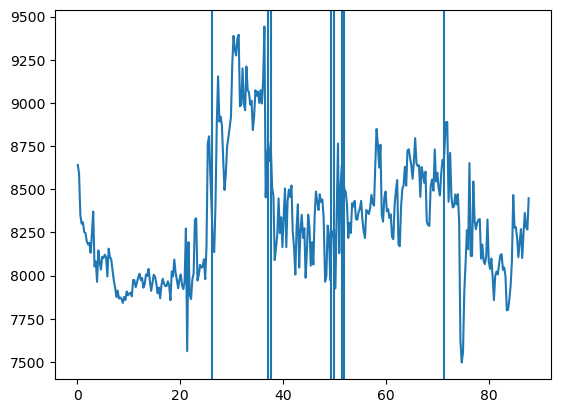

In [264]:
plt.plot(sample_t[:350], sample_data['area'].values[:350])

for t_ in basic_time_cols[1:9]:

    plt.axvline(x=sample_metadata[t_].values[0])

In [238]:
import uuid

sample_data['id'] = uuid.uuid4()

In [ ]:
timesteps.groupby('id').dt.diff().mean() * 3600

34.48939569637687

In [ ]:
sample_data.to_csv('sample_timelapse_data.csv', index=False)

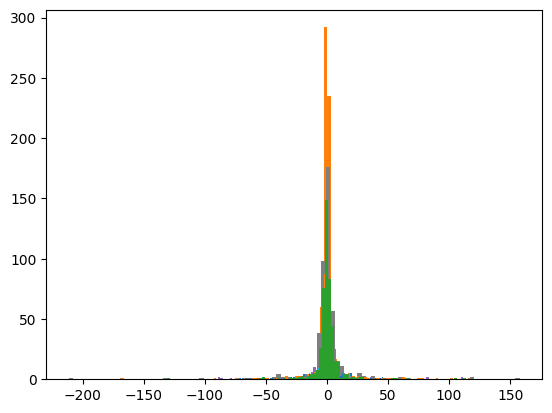

In [ ]:
for embryo_id, embryo_data in sample_data.groupby('id'):

    try:
        plt.hist(embryo_data['perimeter'].diff(), bins=100)

    except:
        continue